In [108]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import random
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [109]:
#defining factors
RATIO_MEN=[0.5,0.65,0.8,0.95] 
PROB_MEN=[0.05,0.20,0.35,0.5,0.65,0.8,0.95]
DIFF_PROB=[-0.45,-0.30,-0.15,0,0.15,0.30,0.45]
STD_ABILITY1=4
STD_ABILITY2=3
MEANS={'0.05':[20.88,10.88], '0.20':[22.9,12.9], '0.35':[24.035,14.035], '0.50':[25,15], '0.65':[25.965,15.965], '0.80':[27.1,17.1], '0.95':[29.12,19.12]}
STD_NOISE=2.5
NUMBER_DATASETS=550
n=1000

In [110]:
def createSample(sex, prob_men, diff_prob):
    if sex=='M':
        height=random.gauss(178.4,7.6)
        ability1=random.gauss(MEANS[format(prob_men,'.2f')][0],STD_ABILITY1)
        ability2=random.gauss(MEANS[format(prob_men,'.2f')][1],STD_ABILITY2)
        ability1_noise=ability1+random.gauss(0,STD_NOISE)
        ability2_noise=ability2+random.gauss(0,STD_NOISE)
    else:
        height=random.gauss(164.7,7.1)
        ability1=random.gauss(MEANS[format(prob_men+diff_prob, '.2f')][0],STD_ABILITY1)
        ability2=random.gauss(MEANS[format(prob_men+diff_prob, '.2f')][1],STD_ABILITY2)
        ability1_noise=ability1+random.gauss(0,STD_NOISE)
        ability2_noise=ability2+random.gauss(0,STD_NOISE)
    
    
    abilitySum_noise = ability1_noise + ability2_noise
    if ability1 + ability2 >=40:
        label=1
    else:
        label=0
    
       
    sample=[sex, height, ability1_noise, ability2_noise, abilitySum_noise , label]
    return sample

In [111]:
def cleanDataSet(data, prob, ratio, diff):
    n1=1000
    cleanData= []
    prob_w = round(prob,2) + round(diff, 2)
    ratio_w = 1 - round(ratio, 2)
    (countM_0, countM_1) = (0,0)
    (countW_0, countW_1) = (0,0)
    (stopM_0, stopM_1) = (False,False)
    (stopW_0, stopW_1) = (False,False)
    
    for row in data:
        if (row[0] == 'M'):
            if ((stopM_1 == False) & (row[5] == 1)):
                countM_1 += 1
                if (countM_1 <= round(n1*round(ratio,2)*round(prob,2))):
                    cleanData.append(row)
                else:
                    stopM_1 = True
                
            elif ((stopM_0 == False) & (row[5] == 0)):
                countM_0 += 1
                if (countM_0 <= round(n1*round(ratio,2)*(1-round(prob,2)))):
                    cleanData.append(row)
                else:
                    stopM_0 = True
        else:
            if ((stopW_1 == False) & (row[5] == 1)):
                countW_1 += 1
                if (countW_1 <= round(n1*prob_w*ratio_w)):
                    cleanData.append(row)
                else:
                    stopW_1 = True
                
            elif ((stopW_0 == False) & (row[5] == 0)):
                countW_0 += 1
                if (countW_0 <= round(n1*ratio_w*(1-prob_w))):
                    cleanData.append(row)
                else:
                    stopW_0 = True        
    return cleanData

In [114]:
def createDataFrame(prob_men, diff_prob, ratio_men):
    sampleList = []
    data = []
    cleanSample =[]

    for i in range(0,int(n*ratio_men)):
        sampleList.append(createSample('M', prob_men, diff_prob))
    for i in range(0,int(n*(1-ratio_men))):
        sampleList.append(createSample('F', prob_men, diff_prob))
    
    cleanSample = cleanDataSet(sampleList, prob_men, ratio_men, diff_prob)
    
    dataSet = pd.DataFrame(sampleList, columns=['Sex', 'Height', 'Ability 1', 'Ability 2', 'Ability Sum', 'Label'])
    dataSet['Sex']= dataSet['Sex'].map({'M':0,'F':1})
    dataSet_M = dataSet.query('Sex == 0').drop(['Sex'], axis=1)
    dataSet_W = dataSet.query('Sex == 1').drop(['Sex'], axis=1)
    
    data = [dataSet, dataSet_M, dataSet_W]
    
    return data

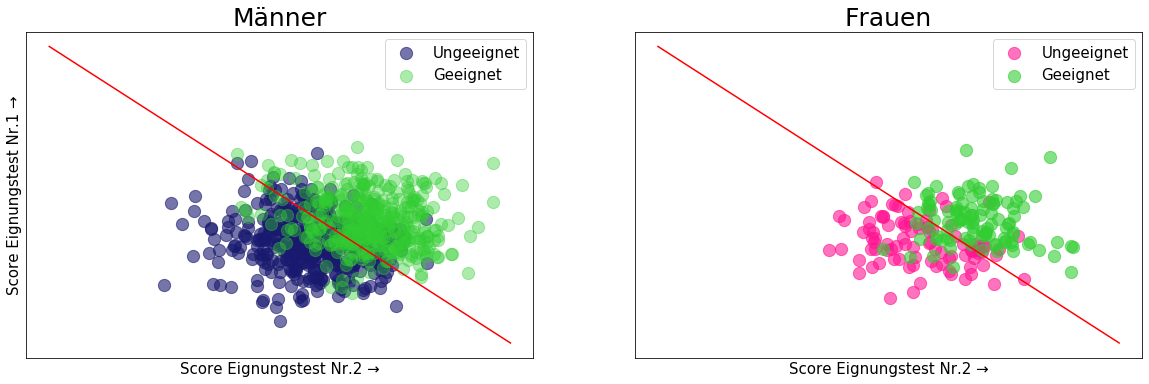

In [148]:
data_H1 = createDataFrame(PROB_MEN[3], DIFF_PROB[3], RATIO_MEN[2])

x_men0=data_H1[1].query('Label == 0')['Ability 1']
x_men1=data_H1[1].query('Label == 1')['Ability 1']
y_men0=data_H1[1].query('Label == 0')['Ability 2']
y_men1=data_H1[1].query('Label == 1')['Ability 2']

x_women0=data_H1[2].query('Label == 0')['Ability 1']
x_women1=data_H1[2].query('Label == 1')['Ability 1']
y_women0=data_H1[2].query('Label == 0')['Ability 2']
y_women1=data_H1[2].query('Label == 1')['Ability 2']

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (20,6))


ax1.plot([0, 10,20,30,40],[40, 30,20,10,0], c='r')
ax1.scatter(x_men0, y_men0, c='midnightblue', alpha=0.6, s= 150.0, label = 'Ungeeignet')
ax1.scatter(x_men1, y_men1, c='limegreen', alpha=0.4, s=150.0, label = 'Geeignet')
ax1.legend(fontsize = 15)
ax1.set_title('Männer', fontsize = 25)
ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_xlabel('Score Eignungstest Nr.2 →',fontsize = 15 )
ax1.set_ylabel('Score Eignungstest Nr.1 →',fontsize = 15)


ax2.plot([0,10,20,30,40],[40, 30,20,10,0], c='r')
ax2.scatter(x_women0, y_women0, c='deeppink', alpha=0.6, s= 150.0, label = 'Ungeeignet')
ax2.scatter(x_women1, y_women1, c='limegreen', alpha=0.6, s= 150.0, label = 'Geeignet')
ax2.legend(fontsize = 15)
ax2.set_title('Frauen', fontsize = 25)
ax2.set_xticks([])
ax2.set_yticks([])
ax2.set_xlabel('Score Eignungstest Nr.2 →', fontsize = 15)


plt.show()

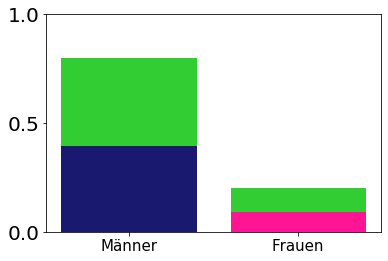

In [150]:
N = 2
anzahl = len(data_H1[0])
nichtGeeignet = (len(data_H1[1].query('Label == 0'))/anzahl, len(data_H1[2].query('Label == 0'))/anzahl)
geeignet = (len(data_H1[1].query('Label == 1'))/anzahl, len(data_H1[2].query('Label == 1'))/anzahl)
ind = np.arange(N)    # the x locations for the groups
width = 0.8    # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, nichtGeeignet, width, color = ('midnightblue', 'deeppink'), )
p2 = plt.bar(ind, geeignet, width,
             bottom= nichtGeeignet, color = 'limegreen')

plt.xticks(ind, ('Männer', 'Frauen'), fontsize = 15)
plt.yticks([0,0.5,1.0], fontsize = 20)
#plt.legend((p1[0], p1[1], p2[0]), ('ungeeignet Männer', 'ungeeignet Frauen', 'geeignet'))

plt.show()


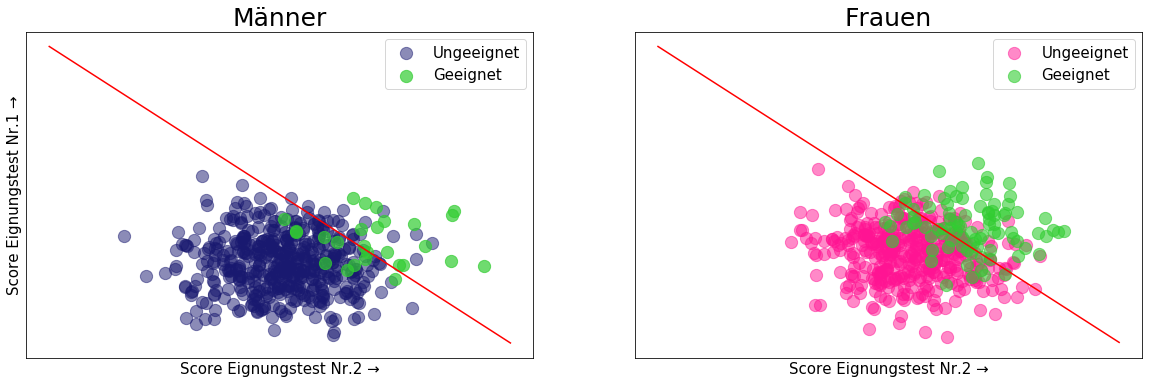

In [142]:
data_H1 = createDataFrame(PROB_MEN[0], DIFF_PROB[4], RATIO_MEN[0])

x_men0=data_H1[1].query('Label == 0')['Ability 1']
x_men1=data_H1[1].query('Label == 1')['Ability 1']
y_men0=data_H1[1].query('Label == 0')['Ability 2']
y_men1=data_H1[1].query('Label == 1')['Ability 2']

x_women0=data_H1[2].query('Label == 0')['Ability 1']
x_women1=data_H1[2].query('Label == 1')['Ability 1']
y_women0=data_H1[2].query('Label == 0')['Ability 2']
y_women1=data_H1[2].query('Label == 1')['Ability 2']

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (20,6))


ax1.plot([0, 10,20,30,40],[40, 30,20,10,0], c='r')
ax1.scatter(x_men0, y_men0, c='midnightblue', alpha=0.5, s= 150.0, label = 'Ungeeignet')
ax1.scatter(x_men1, y_men1, c='limegreen', alpha=0.7, s=150.0, label = 'Geeignet')
ax1.legend(fontsize = 15)
ax1.set_title('Männer', fontsize = 25)
ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_xlabel('Score Eignungstest Nr.2 →',fontsize = 15 )
ax1.set_ylabel('Score Eignungstest Nr.1 →',fontsize = 15)


ax2.plot([0,10,20,30,40],[40, 30,20,10,0], c='r')
ax2.scatter(x_women0, y_women0, c='deeppink', alpha=0.5, s= 150.0, label = 'Ungeeignet')
ax2.scatter(x_women1, y_women1, c='limegreen', alpha=0.6, s= 150.0, label = 'Geeignet')
ax2.legend(fontsize = 15)
ax2.set_title('Frauen', fontsize = 25)
ax2.set_xticks([])
ax2.set_yticks([])
ax2.set_xlabel('Score Eignungstest Nr.2 →', fontsize = 15)


plt.show()

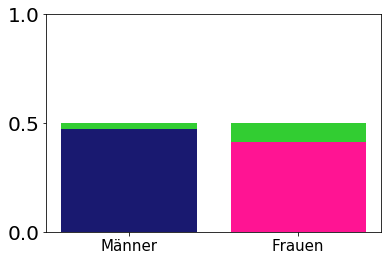

In [145]:
N = 2
anzahl = len(data_H1[0])
nichtGeeignet = (len(data_H1[1].query('Label == 0'))/anzahl, len(data_H1[2].query('Label == 0'))/anzahl)
geeignet = (len(data_H1[1].query('Label == 1'))/anzahl, len(data_H1[2].query('Label == 1'))/anzahl)
ind = np.arange(N)    # the x locations for the groups
width = 0.8    # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, nichtGeeignet, width, color = ('midnightblue', 'deeppink'), )
p2 = plt.bar(ind, geeignet, width,
             bottom= nichtGeeignet, color = 'limegreen')

plt.xticks(ind, ('Männer', 'Frauen'), fontsize = 15)
plt.yticks([0,0.5,1.0], fontsize = 20)
#plt.legend((p1[0], p1[1], p2[0]), ('ungeeignet Männer', 'ungeeignet Frauen', 'geeignet'))

plt.show()


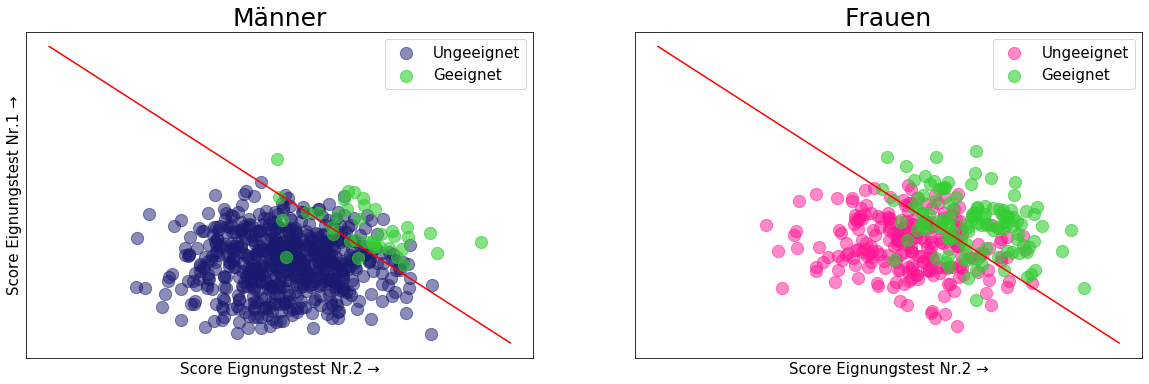

In [146]:
data_H1 = createDataFrame(PROB_MEN[0], DIFF_PROB[5], RATIO_MEN[1])

x_men0=data_H1[1].query('Label == 0')['Ability 1']
x_men1=data_H1[1].query('Label == 1')['Ability 1']
y_men0=data_H1[1].query('Label == 0')['Ability 2']
y_men1=data_H1[1].query('Label == 1')['Ability 2']

x_women0=data_H1[2].query('Label == 0')['Ability 1']
x_women1=data_H1[2].query('Label == 1')['Ability 1']
y_women0=data_H1[2].query('Label == 0')['Ability 2']
y_women1=data_H1[2].query('Label == 1')['Ability 2']

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (20,6))


ax1.plot([0, 10,20,30,40],[40, 30,20,10,0], c='r')
ax1.scatter(x_men0, y_men0, c='midnightblue', alpha=0.5, s= 150.0, label = 'Ungeeignet')
ax1.scatter(x_men1, y_men1, c='limegreen', alpha=0.6, s=150.0, label = 'Geeignet')
ax1.legend(fontsize = 15)
ax1.set_title('Männer', fontsize = 25)
ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_xlabel('Score Eignungstest Nr.2 →',fontsize = 15 )
ax1.set_ylabel('Score Eignungstest Nr.1 →',fontsize = 15)


ax2.plot([0,10,20,30,40],[40, 30,20,10,0], c='r')
ax2.scatter(x_women0, y_women0, c='deeppink', alpha=0.5, s= 150.0, label = 'Ungeeignet')
ax2.scatter(x_women1, y_women1, c='limegreen', alpha=0.6, s= 150.0, label = 'Geeignet')
ax2.legend(fontsize = 15)
ax2.set_title('Frauen', fontsize = 25)
ax2.set_xticks([])
ax2.set_yticks([])
ax2.set_xlabel('Score Eignungstest Nr.2 →', fontsize = 15)


plt.show()

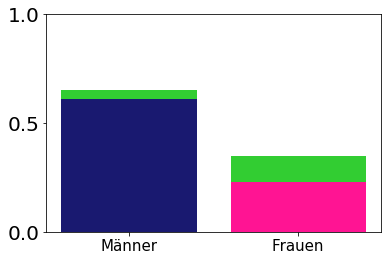

In [147]:
N = 2
anzahl = len(data_H1[0])
nichtGeeignet = (len(data_H1[1].query('Label == 0'))/anzahl, len(data_H1[2].query('Label == 0'))/anzahl)
geeignet = (len(data_H1[1].query('Label == 1'))/anzahl, len(data_H1[2].query('Label == 1'))/anzahl)
ind = np.arange(N)    # the x locations for the groups
width = 0.8    # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, nichtGeeignet, width, color = ('midnightblue', 'deeppink'), )
p2 = plt.bar(ind, geeignet, width,
             bottom= nichtGeeignet, color = 'limegreen')

plt.xticks(ind, ('Männer', 'Frauen'), fontsize = 15)
plt.yticks([0,0.5,1.0], fontsize = 20)
plt.ylim(0.0, 1.0)
#plt.legend((p1[0], p1[1], p2[0]), ('ungeeignet Männer', 'ungeeignet Frauen', 'geeignet'))

plt.show()


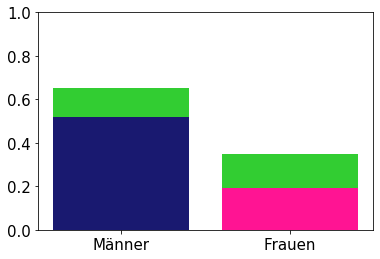

In [130]:
data_H1 = createDataFrame(PROB_MEN[1], DIFF_PROB[5], RATIO_MEN[1])

x_men0=data_H1[1].query('Label == 0')['Ability 1']
x_men1=data_H1[1].query('Label == 1')['Ability 1']
y_men0=data_H1[1].query('Label == 0')['Ability 2']
y_men1=data_H1[1].query('Label == 1')['Ability 2']

x_women0=data_H1[2].query('Label == 0')['Ability 1']
x_women1=data_H1[2].query('Label == 1')['Ability 1']
y_women0=data_H1[2].query('Label == 0')['Ability 2']
y_women1=data_H1[2].query('Label == 1')['Ability 2']

N = 2
anzahl = len(data_H1[0])
nichtGeeignet = (len(data_H1[1].query('Label == 0'))/anzahl, len(data_H1[2].query('Label == 0'))/anzahl)
geeignet = (len(data_H1[1].query('Label == 1'))/anzahl, len(data_H1[2].query('Label == 1'))/anzahl)
ind = np.arange(N)    # the x locations for the groups
width = 0.8    # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, nichtGeeignet, width, color = ('midnightblue', 'deeppink'),)
p2 = plt.bar(ind, geeignet, width,
             bottom= nichtGeeignet, color = 'limegreen')

plt.xticks(ind, ('Männer', 'Frauen'), fontsize = 15)
plt.yticks(fontsize = 15)
plt.ylim(0.0, 1.0)
#plt.legend((p1[0], p1[1], p2[0]), ('ungeeignet Männer', 'ungeeignet Frauen', 'geeignet'))

plt.show()

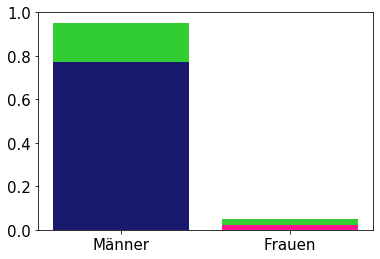

In [129]:
data_H1 = createDataFrame(PROB_MEN[1], DIFF_PROB[5], RATIO_MEN[3])

x_men0=data_H1[1].query('Label == 0')['Ability 1']
x_men1=data_H1[1].query('Label == 1')['Ability 1']
y_men0=data_H1[1].query('Label == 0')['Ability 2']
y_men1=data_H1[1].query('Label == 1')['Ability 2']

x_women0=data_H1[2].query('Label == 0')['Ability 1']
x_women1=data_H1[2].query('Label == 1')['Ability 1']
y_women0=data_H1[2].query('Label == 0')['Ability 2']
y_women1=data_H1[2].query('Label == 1')['Ability 2']

N = 2
anzahl = len(data_H1[0])
nichtGeeignet = (len(data_H1[1].query('Label == 0'))/anzahl, len(data_H1[2].query('Label == 0'))/anzahl)
geeignet = (len(data_H1[1].query('Label == 1'))/anzahl, len(data_H1[2].query('Label == 1'))/anzahl)
ind = np.arange(N)    # the x locations for the groups
width = 0.8    # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, nichtGeeignet, width, color = ('midnightblue', 'deeppink'), )
p2 = plt.bar(ind, geeignet, width,
             bottom= nichtGeeignet, color = 'limegreen')

plt.xticks(ind, ('Männer', 'Frauen'), fontsize = 15)
plt.yticks(fontsize = 15)
plt.ylim(0.0, 1.0)
#plt.legend((p1[0], p1[1], p2[0]), ('ungeeignet Männer', 'ungeeignet Frauen', 'geeignet'))

plt.show()

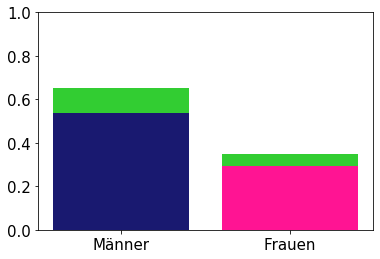

In [156]:
data_H1 = createDataFrame(PROB_MEN[1], DIFF_PROB[3], RATIO_MEN[1])

x_men0=data_H1[1].query('Label == 0')['Ability 1']
x_men1=data_H1[1].query('Label == 1')['Ability 1']
y_men0=data_H1[1].query('Label == 0')['Ability 2']
y_men1=data_H1[1].query('Label == 1')['Ability 2']

x_women0=data_H1[2].query('Label == 0')['Ability 1']
x_women1=data_H1[2].query('Label == 1')['Ability 1']
y_women0=data_H1[2].query('Label == 0')['Ability 2']
y_women1=data_H1[2].query('Label == 1')['Ability 2']

N = 2
anzahl = len(data_H1[0])
nichtGeeignet = (len(data_H1[1].query('Label == 0'))/anzahl, len(data_H1[2].query('Label == 0'))/anzahl)
geeignet = (len(data_H1[1].query('Label == 1'))/anzahl, len(data_H1[2].query('Label == 1'))/anzahl)
ind = np.arange(N)    # the x locations for the groups
width = 0.8    # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, nichtGeeignet, width, color = ('midnightblue', 'deeppink'), )
p2 = plt.bar(ind, geeignet, width,
             bottom= nichtGeeignet, color = 'limegreen')

plt.xticks(ind, ('Männer', 'Frauen'), fontsize = 15)
plt.yticks(fontsize = 15)
plt.ylim(0.0, 1.0)
#plt.legend((p1[0], p1[1], p2[0]), ('ungeeignet Männer', 'ungeeignet Frauen', 'geeignet'))

plt.show()

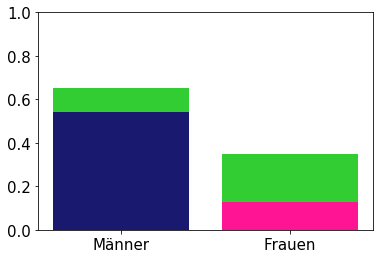

In [158]:
data_H1 = createDataFrame(PROB_MEN[1], DIFF_PROB[6], RATIO_MEN[1])

x_men0=data_H1[1].query('Label == 0')['Ability 1']
x_men1=data_H1[1].query('Label == 1')['Ability 1']
y_men0=data_H1[1].query('Label == 0')['Ability 2']
y_men1=data_H1[1].query('Label == 1')['Ability 2']

x_women0=data_H1[2].query('Label == 0')['Ability 1']
x_women1=data_H1[2].query('Label == 1')['Ability 1']
y_women0=data_H1[2].query('Label == 0')['Ability 2']
y_women1=data_H1[2].query('Label == 1')['Ability 2']

N = 2
anzahl = len(data_H1[0])
nichtGeeignet = (len(data_H1[1].query('Label == 0'))/anzahl, len(data_H1[2].query('Label == 0'))/anzahl)
geeignet = (len(data_H1[1].query('Label == 1'))/anzahl, len(data_H1[2].query('Label == 1'))/anzahl)
ind = np.arange(N)    # the x locations for the groups
width = 0.8    # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, nichtGeeignet, width, color = ('midnightblue', 'deeppink'), )
p2 = plt.bar(ind, geeignet, width,
             bottom= nichtGeeignet, color = 'limegreen')

plt.xticks(ind, ('Männer', 'Frauen'), fontsize = 15)
plt.yticks(fontsize = 15)
plt.ylim(0.0, 1.0)
#plt.legend((p1[0], p1[1], p2[0]), ('ungeeignet Männer', 'ungeeignet Frauen', 'geeignet'))

plt.show()